In [1]:
import os
from lxml import etree
from nltk.tree import ParentedTree
from rstviewer import embed_rs3_image, embed_rs3str_image
import discoursegraphs as dg
from discoursegraphs.readwrite.rst.rs3 import extract_relationtypes
from discoursegraphs import t

In [2]:
# !ls *.rs3

In [3]:
# embed_rs3_image("foo-bar-only-segments.rs3")

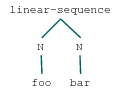

In [4]:
# as the leaves are unconnected, we need to add a root node and edges
# maybe we should always connect unconnected nodes into a linear-sequence multinuc
t("linear-sequence", [
    ("N", "foo"),
    ("N", "bar")])

In [5]:
# embed_rs3_image("foo-bar-circ-foo-to-bar.rs3")

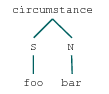

In [6]:
t("circumstance", [
    ("S", "foo"),
    ("N", "bar")])

In [7]:
# embed_rs3_image("foo-bar-elab-foo-to-bar.rs3")

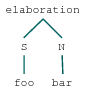

In [8]:
t("elaboration", [
    ("S", "foo"),
    ("N", "bar")])

In [9]:
# embed_rs3_image("foo-bar-circ-bar-to-foo.rs3")

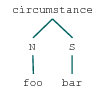

In [10]:
t("circumstance", [
    ("N", "foo"),
    ("S", "bar")])

In [11]:
# embed_rs3_image("foo-bar-elab-bar-to-foo.rs3")

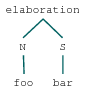

In [12]:
t("elaboration", [
    ("N", "foo"),
    ("S", "bar")])

In [13]:
# embed_rs3_image("foo-bar-foo-conj-bar.rs3")

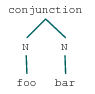

In [14]:
t("conjunction", [
    ("N", "foo"),
    ("N", "bar")])

In [15]:
# embed_rs3_image("foo-bar-foo-joint-bar.rs3")

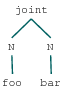

In [16]:
t("joint", [
    ("N", "foo"),
    ("N", "bar")])

In [17]:
# trees_with_three_elems = !ls eins*.rs3
# for rs3_file in trees_with_three_elems:
#     print "embed_rs3_image('{}')".format(rs3_file)

In [18]:
# embed_rs3_image('eins-zwei-drei-only-segments.rs3')

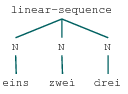

In [19]:
# as the leaves are unconnected, we need to add a root node and edges
# maybe we should always connect unconnected nodes into a linear-sequence multinuc
t("linear-sequence", [("N", "eins"), ("N", "zwei"), ("N", "drei")])

In [20]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-to-drei).rs3')

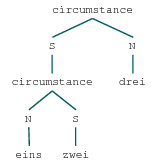

In [21]:
t("circumstance", [
    ("S", [
        ("circumstance", [
            ("N", "eins"),
            ("S", "zwei")])]),
    ("N", "drei")])

In [22]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-from-zwei)-from-drei).rs3')

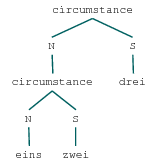

In [23]:
t("circumstance", [
    ("N", [
        ("circumstance", [
            ("N", "eins"),
            ("S", "zwei")])]),
    ("S", "drei")])

In [24]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-to-drei.rs3')

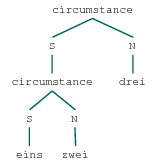

In [25]:
t("circumstance", [
    ("S", [
        ("circumstance", [
            ("S", "eins"),
            ("N", "zwei")])]),
    ("N", "drei")])

In [26]:
# embed_rs3_image('eins-zwei-drei-(circ-(circ-eins-to-zwei)-from-drei).rs3')

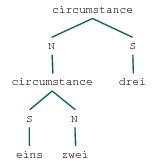

In [27]:
t("circumstance", [
    ("N", [
        ("circumstance", [
            ("S", "eins"),
            ("N", "zwei")])]),
    ("S", "drei")])

In [28]:
# embed_rs3_image('eins-zwei-drei-(circ-eins-to-(joint-zwei-and-drei).rs3')

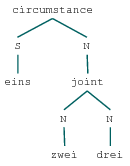

In [29]:
t("circumstance", [
    ("S", "eins"),
    ("N", [
        ("joint", [
            ("N", "zwei"),
            ("N", "drei")])])])

In [30]:
# embed_rs3_image('eins-zwei-drei-(circ-eins-from-(joint-zwei-and-drei).rs3')

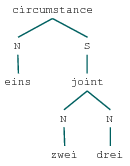

In [31]:
t("circumstance", [
    ("N", "eins"),
    ("S", [
        ("joint", [
            ("N", "zwei"),
            ("N", "drei")])])])

In [32]:
# embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-to-drei).rs3')

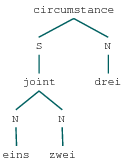

In [33]:
t("circumstance", [
    ("S", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("N", "drei")
])

In [34]:
# embed_rs3_image('eins-zwei-drei-(circ-(joint-eins-and-zwei)-from-drei).rs3')

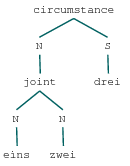

In [35]:
t("circumstance", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [36]:
# embed_rs3_image('eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3')

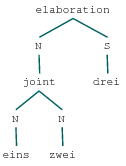

In [37]:
t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [38]:
# embed_rs3_image('eins-zwei-drei-(joint-eins-and-zwei-and-drei).rs3')

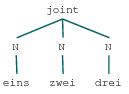

In [39]:
t("joint", [("N", "eins"), ("N", "zwei"), ("N", "drei")])

In [40]:
example_tree = t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [41]:
example_tree.leaves()

['eins', 'zwei', 'drei']

In [42]:
example_tree.pretty_print()

           elaboration     
        ________|_______    
       N                |  
       |                |   
     joint              |  
  _____|________        |   
 N              N       S  
 |              |       |   
eins           zwei    drei



# TODO: does dg.readwrite.tree work with RSTGraph?

In [43]:
example_rs3 = 'eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3'

In [44]:
# embed_rs3_image(example_rs3)

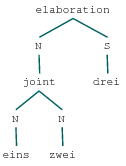

In [45]:
t("elaboration", [
    ("N", [
        ("joint", [
            ("N", "eins"),
            ("N", "zwei")
        ])
    ]),
    ("S", "drei")
])

In [46]:
rdg = dg.read_rs3(example_rs3)

In [47]:
# %load_ext gvmagic

In [48]:
# %dotstr dg.print_dot(rdg)

# TODO: why is root node not connected?

because the root node is a `<segment>` and not a `<group>`.

```xml
<body>
    <segment id="1">eins</segment>
    <segment id="2" parent="4" relname="joint"> zwei</segment>
    <segment id="3" parent="4" relname="joint"> drei</segment>
    <group id="4" type="multinuc" parent="1" relname="elaboration" />
</body>
```

In [49]:
# rdg_maz00001 = dg.corpora.pcc.get_document('maz-00001')

In [50]:
# dg.corpora.pcc.get_files_by_document_id('maz-00001')

In [51]:
# maz00001_rs3 = "/usr/local/lib/python2.7/dist-packages/discoursegraphs-0.3.2-py2.7.egg/discoursegraphs/data/potsdam-commentary-corpus-2.0.0/rst/maz-00001.rs3"
# rdg_maz00001 = dg.read_rs3(maz00001_rs3, tokenize=False)

In [52]:
# %dotstr dg.print_dot(rdg_maz00001)

In [53]:
# 'eins-zwei-drei-(elab-eins-from-(joint-zwei-and-drei).rs3'

rs3str1 = """<rst>
  <header>
    <relations>
      <rel name="elaboration" type="rst" />
      <rel name="joint" type="multinuc" />
    </relations>
  </header>
  <body>
    <segment id="1">eins</segment>
    <segment id="2" parent="4" relname="joint"> zwei</segment>
    <segment id="3" parent="4" relname="joint"> drei</segment>
    <group id="4" type="multinuc" parent="1" relname="elaboration" />
  </body>
</rst>"""

In [54]:
# embed_rs3str_image(rs3str1)

In [55]:
rs3etree1 = etree.fromstring(rs3str1)
extract_relationtypes(rs3etree1)

{'elaboration': 'rst', 'joint': 'multinuc'}

In [56]:
from collections import defaultdict

def rs3_to_dicts(rs3_file):
    rs3_etree = etree.parse(rs3_file)
    reltypes = extract_relationtypes(rs3_etree)
    elements = defaultdict(lambda : defaultdict(str))
    children = defaultdict(list)

    for elem in rs3_etree.iter('segment'):
        segment_id = elem.attrib['id']
        parent_id = elem.attrib.get('parent')
        elements[segment_id]['parent'] = parent_id
        
        relname = elem.attrib.get('relname')
        elements[segment_id]['relname'] = relname
        if relname == None:
            elements[segment_id]['segment_type'] = 'isolate'
        elif relname == 'span':
            elements[segment_id]['segment_type'] = 'nucleus'
        else:
            if reltypes[relname] == 'rst':
                elements[segment_id]['segment_type'] = 'satellite'
            else:  #reltypes[relname] == 'multinuc'
                elements[segment_id]['segment_type'] = 'multinuc'
                    
        elements[segment_id]['text'] = elem.text
        elements[segment_id]['element_type'] = 'segment'
        children[parent_id].append(segment_id)

    for elem in rs3_etree.iter('group'):
        group_id = elem.attrib['id']
        parent_id = elem.attrib.get('parent')
        elements[group_id]['parent'] = parent_id
        elements[group_id]['relname'] = elem.attrib.get('relname')
        elements[group_id]['group_type'] = elem.attrib.get('type')
        elements[group_id]['element_type'] = 'group'
        children[parent_id].append(group_id)
    
    return children, elements

In [57]:
def children_dict2tree(child_dict, elements_dict, start_node=None):
    children = child_dict[start_node]

    if len(children) == 0:
        edu_text = elements_dict[start_node]['text']
        formatted_edu_text = '\n'.join(edu_text.split())
        return t(start_node, formatted_edu_text)
    if len(children) == 1:
        child = children[0]
        return t(child, children_dict2tree(child_dict, elements_dict, start_node=child))
    else:
        child_trees = [children_dict2tree(child_dict, elements_dict, start_node=child)
                       for child in children]
        if start_node is None:
            return t("root", child_trees)
        else:
            return child_trees

In [58]:
# children_dict2tree(children, elements)

# TODO: study the smallest PCC RS3 file that has these errors

In [59]:
smallest_pcc_rs3_file = sorted((os.path.getsize(rs3_file), rs3_file)
                               for rs3_file in dg.corpora.pcc.get_files_by_layer('rst'))[0][1]

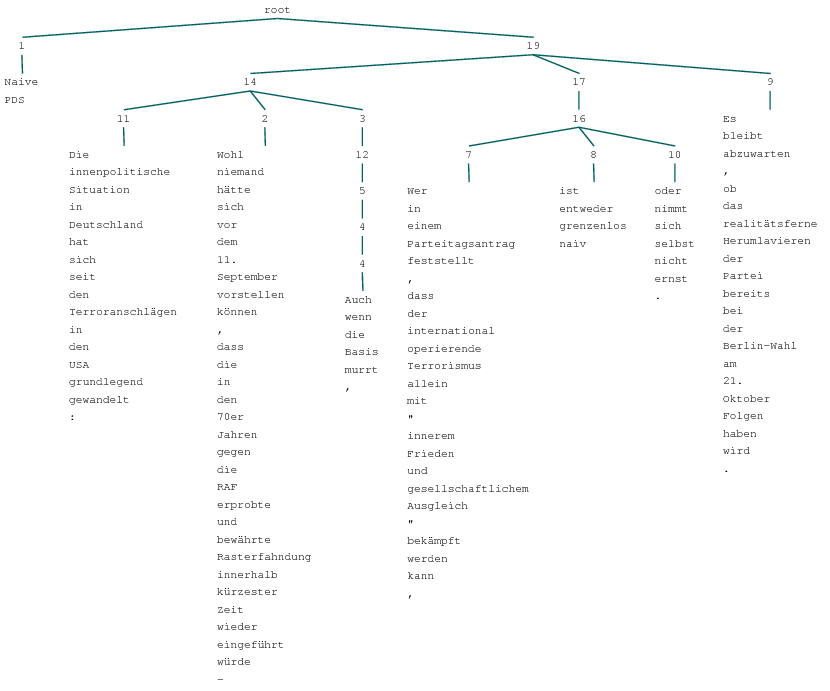

In [60]:
child_dict, elements_dict = rs3_to_dicts(smallest_pcc_rs3_file)
children_dict2tree(child_dict, elements_dict)

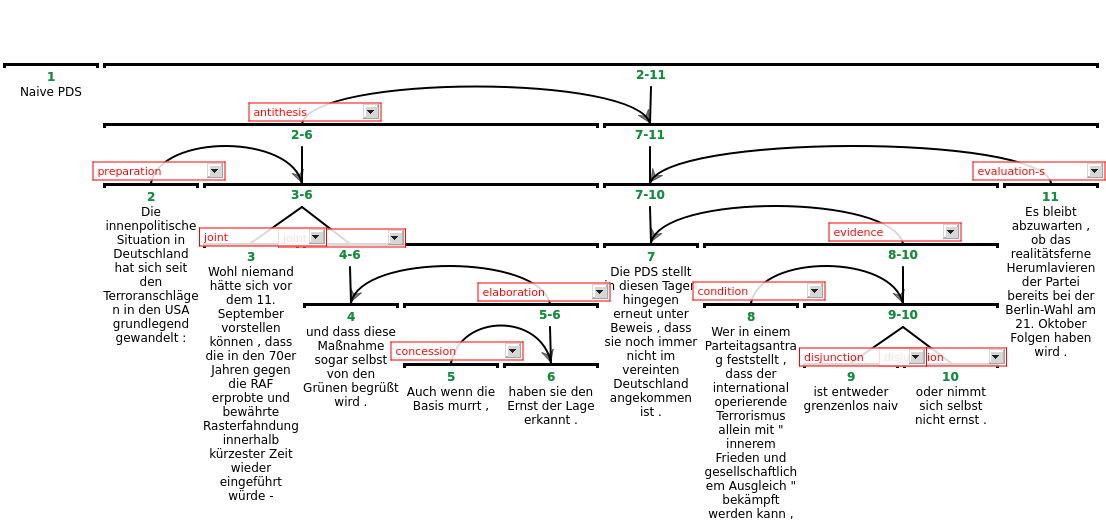

In [61]:
embed_rs3_image(smallest_pcc_rs3_file)

In [62]:
# smallest_pcc_rs3_file

In [63]:
child_dict

defaultdict(list,
            {None: ['1', '20'],
             '1': [],
             '10': [],
             '11': [],
             '12': ['5'],
             '13': ['3'],
             '14': ['11', '2', '13'],
             '15': ['14'],
             '16': ['7', '8', '10'],
             '17': ['16'],
             '18': ['6', '9'],
             '19': ['15', '18'],
             '2': [],
             '20': ['19'],
             '3': ['12'],
             '4': [],
             '5': ['4'],
             '6': ['17'],
             '7': [],
             '8': [],
             '9': []})

In [64]:
elements_dict['1'] # is a segment -> no children

defaultdict(str,
            {'element_type': 'segment',
             'parent': None,
             'relname': None,
             'segment_type': 'isolate',
             'text': '\n\nNaive PDS'})

In [65]:
elements_dict['20'] # is a span

defaultdict(str,
            {'element_type': 'group',
             'group_type': 'span',
             'parent': None,
             'relname': None})

In [66]:
child_dict['20']

['19']

In [67]:
elements_dict['19'] # is a span

defaultdict(str,
            {'element_type': 'group',
             'group_type': 'span',
             'parent': '20',
             'relname': 'span'})

In [68]:
child_dict['19'] # has two children

['15', '18']

In [69]:
# work directly on children that are not spans. look at span's children (recursion?)
for child in child_dict['19']:
    print child
    print elements_dict[child], "\n"
    
    child_relation = elements_dict[child]['relname']
    if child_relation != 'span':
        print t(child_relation, [(child, []), ('19', [])])

15
defaultdict(<type 'str'>, {'relname': 'antithesis', 'group_type': 'span', 'parent': '19', 'element_type': 'group'}) 

(antithesis (15 ) (19 ))
18
defaultdict(<type 'str'>, {'relname': 'span', 'group_type': 'span', 'parent': '19', 'element_type': 'group'}) 



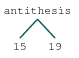

In [70]:
t('antithesis', [
    ('15', []),
    ('19', [])
])

In [71]:
child_dict['18'] # 18 is a span, so we have to look at its children

['6', '9']

In [72]:
elements_dict['6'] # is a segment (-> no children);

defaultdict(str,
            {'element_type': 'segment',
             'parent': '18',
             'relname': 'span',
             'segment_type': 'nucleus',
             'text': '  Die PDS stellt in diesen Tagen hingegen erneut unter Beweis , dass sie noch immer nicht im vereinten Deutschland angekommen ist .'})

In [73]:
elements_dict['9'] # is a segment (-> no children);

defaultdict(str,
            {'element_type': 'segment',
             'parent': '18',
             'relname': 'evaluation-s',
             'segment_type': 'satellite',
             'text': u'  Es bleibt abzuwarten , ob das realit\xe4tsferne Herumlavieren der Partei bereits bei der Berlin-Wahl am 21. Oktober Folgen haben wird .'})

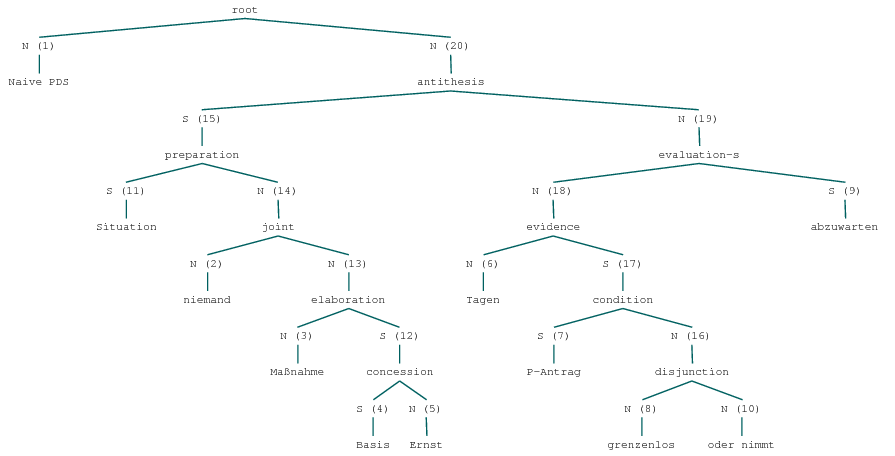

In [74]:
t("root", [
    ("N (1)", "Naive PDS"),
    ("N (20)", [
        ("antithesis", [
            ("S (15)", [
                ("preparation", [
                    ("S (11)", "Situation"),
                    ("N (14)", [
                        ("joint", [
                            ("N (2)", "niemand"),
                            ("N (13)", [
                                ("elaboration", [
                                    ("N (3)", "Maßnahme"),
                                    ("S (12)", [
                                        ("concession", [
                                            ("S (4)", "Basis"),
                                            ("N (5)", "Ernst")
                                        ])
                                    ])
                                ])
                            ])
                        ])
                    ])
                ])
            ]),
            ("N (19)", [
                ("evaluation-s", [
                    ("N (18)", [
                        ("evidence", [
                            ("N (6)", "Tagen"),
                            ("S (17)", [
                                ("condition", [
                                    ("S (7)", "P-Antrag"),
                                    ("N (16)", [
                                        ("disjunction", [
                                            ("N (8)", "grenzenlos"),
                                            ("N (10)", "oder nimmt")
                                        ])
                                    ])
                                ])
                            ])
                        ])
                    ]),
                    ("S (9)", "abzuwarten")
                ])
            ])
        ])
    ])
])

In [75]:
elements_dict['10']

defaultdict(str,
            {'element_type': 'segment',
             'parent': '16',
             'relname': 'disjunction',
             'segment_type': 'multinuc',
             'text': ' oder nimmt sich selbst nicht ernst .'})

In [76]:
elements_dict['16']

defaultdict(str,
            {'element_type': 'group',
             'group_type': 'multinuc',
             'parent': '17',
             'relname': 'span'})

In [77]:
child_dict['16']

['7', '8', '10']

In [82]:
def get_edu_label(element):
    assert element['element_type'] == 'segment'
    if element['segment_type'] in ('nucleus', 'multinuc'):
        return 'N'
    else:
        return 'S'    

def rt(rs3_file, start_node=None):
    child_dict, elements_dict = rs3_to_dicts(rs3_file)
    
    element = elements_dict[start_node]
    children = child_dict[start_node]
    if len(children) == 0:
        node_label = get_edu_label(element)
        return t(node_label, element['text'])
    else:  #len(children) > 0
        assert element['element_type'] == 'group'
        if element['group_type'] == 'multinuc':
            multinuc_children = [c for c in child_dict[start_node] if elements_dict[c].get('segment_type') == 'multinuc']
            multinuc_subtree = [("N", elements_dict[c]['text']) for c in multinuc_children]
            return t('multinuc', multinuc_subtree)

        else:  #element['group_type'] == 'span'
            raise NotImplementedError("element: {}".format(element))
    

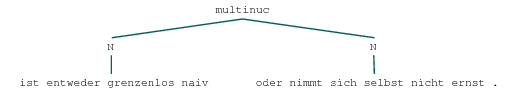

In [83]:
rt(smallest_pcc_rs3_file, start_node='16')

In [80]:
child_dict['10']

[]

In [81]:
elements_dict['16']

defaultdict(str,
            {'element_type': 'group',
             'group_type': 'multinuc',
             'parent': '17',
             'relname': 'span'})

In [ ]:
child_dict['16']

In [ ]:
elements_dict['7']

In [ ]:
elements_dict['8']

In [ ]:
elements_dict['10']

In [ ]:
e = '16'

[c for c in child_dict[e] if elements_dict[c].get('segment_type') == 'multinuc']

In [ ]:
z = t("foo", "bar")

In [ ]:
z.__repr__()

In [ ]:
z.pretty_print()

In [ ]:
def print_segments(rs3_file):
    rs3_etree = etree.parse(rs3_file)
    reltypes = extract_relationtypes(rs3_etree)

    for elem in rs3_etree.iter('segment'):
        segment_id = elem.attrib['id']
        print "Segment ID: ", segment_id
        parent_id = elem.attrib.get('parent')        
        relname = elem.attrib.get('relname')
        edu_text = elem.text.strip()

        if parent_id is None:
            segment_tree = t("N", edu_text)
            IPython.core.display.display(segment_tree)
        else:
            reltype = reltypes.get(relname, 'span')
            if reltype == 'rst':
                segment_tree = t(relname, [
                    ('S', edu_text),
                    ('N', "... cf. {}".format(parent_id))])
                IPython.core.display.display(segment_tree)
            elif reltype == 'multinuc':
                segment_tree = t(relname, [
                    ('S', edu_text),
                    ('N', "... cf. {}".format(parent_id))])
                IPython.core.display.display(segment_tree)
            else:  #reltype == 'span'
                # segment is a nucleus
                pass  #raise NotImplementedError

In [ ]:
print_segments(smallest_pcc_rs3_file)

In [ ]:
from IPython.display import display

In [ ]:
display(t("foo"))

In [ ]:
from nltk.draw.tree import TreeView

In [ ]:
print TreeView(t("foo"))

In [ ]:
for x in ('a','b','c'):
    IPython.core.display.display(t(x))

In [84]:
smallest_pcc_rs3_file

'/usr/local/lib/python2.7/dist-packages/discoursegraphs-0.3.2-py2.7.egg/discoursegraphs/data/potsdam-commentary-corpus-2.0.0/rst/maz-1818.rs3'